<a href="https://colab.research.google.com/github/Hbrand03/Intro_to_ML_Work/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1A

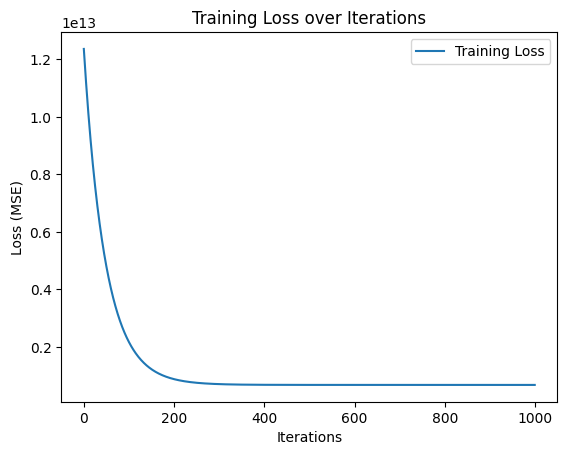

Final theta values: [4706324.19866291  679784.16108007  113853.85524508  564996.83769347
  423850.53400103  288572.51539751]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
housing_data = pd.read_csv(url)

# Select the input variables and the target variable
X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = housing_data['price'].values

# Split the data into 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to compute the Mean Squared Error
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Function for gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Add an intercept term to X_train_scaled
m = X_train_scaled.shape[0]  # number of training examples
X_train_bias = np.c_[np.ones((m, 1)), X_train_scaled]  # Add a column of ones for the bias term

# Initialize theta (parameters) to zeros
theta = np.zeros(X_train_bias.shape[1])

# Set hyperparameters for gradient descent
learning_rate = 0.01
iterations = 1000

# Perform gradient descent
theta_best, cost_history = gradient_descent(X_train_bias, y_train, theta, learning_rate, iterations)

# Plot the training loss over iterations
plt.plot(range(iterations), cost_history, label='Training Loss')
plt.title('Training Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Print the final parameters (theta values)
print(f'Final theta values: {theta_best}')


Problem 1B

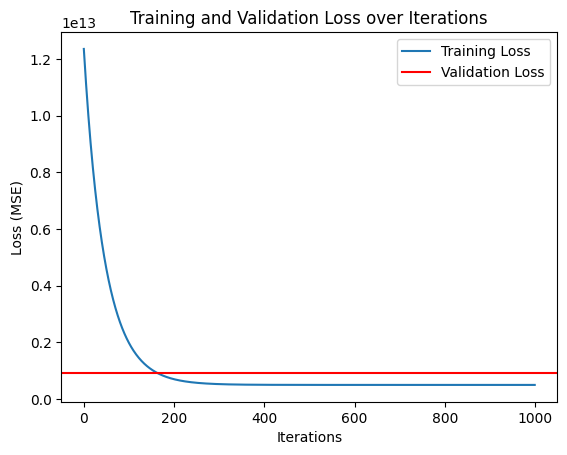

Final theta values: [4706324.19866291  522087.04752932   60657.90506096  528889.87497578
  363380.87926714  145047.7854994    94723.52054041  206441.94710708
  156143.91037252  373875.28580191  211389.44518885  269574.36203818]
Validation Loss: 900111363844.0188


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
housing_data = pd.read_csv(url)

# Select the input variables (11 variables)
X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                  'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                  'parking', 'prefarea']]

# Encode categorical variables (yes/no) to 0 and 1
X = X.replace({'yes': 1, 'no': 0})

# Target variable
y = housing_data['price'].values

# Split the data into 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/standardize the numerical data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to compute the Mean Squared Error
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Function for gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Add an intercept term to X_train_scaled
m = X_train_scaled.shape[0]  # number of training examples
X_train_bias = np.c_[np.ones((m, 1)), X_train_scaled]  # Add a column of ones for the bias term

# Initialize theta (parameters) to zeros
theta = np.zeros(X_train_bias.shape[1])

# Set hyperparameters for gradient descent
learning_rate = 0.01
iterations = 1000

# Perform gradient descent
theta_best, cost_history = gradient_descent(X_train_bias, y_train, theta, learning_rate, iterations)

# Evaluate on test set (validation loss)
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
validation_loss = compute_cost(X_test_bias, y_test, theta_best)

# Plot the training loss over iterations
plt.plot(range(iterations), cost_history, label='Training Loss')
plt.axhline(y=validation_loss, color='r', linestyle='-', label='Validation Loss')
plt.title('Training and Validation Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Print the final parameters (theta values)
print(f'Final theta values: {theta_best}')
print(f'Validation Loss: {validation_loss}')


Problem 2a

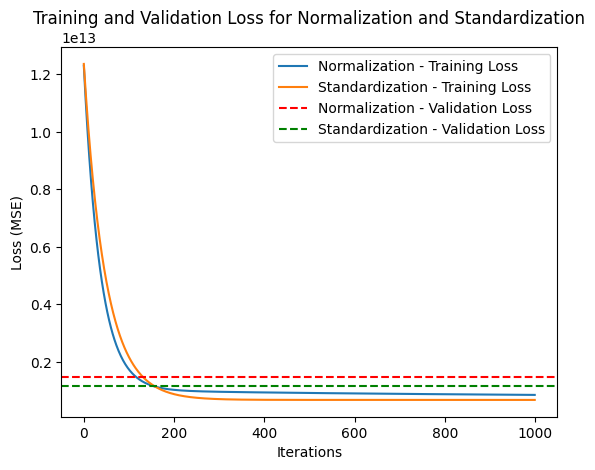

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
housing_data = pd.read_csv(url)

# Select the input variables (same as Problem 1.a)
X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = housing_data['price'].values

# Split the data into 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to compute the Mean Squared Error
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Function for gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Helper function to train and evaluate the model
def train_and_evaluate(X_train, y_train, X_test, y_test, scaler_type):
    if scaler_type == 'normalization':
        scaler = MinMaxScaler()  # Normalization (values between 0 and 1)
    elif scaler_type == 'standardization':
        scaler = StandardScaler()  # Standardization (mean 0, std 1)

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Add intercept term to the input data
    X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
    X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

    # Initialize theta to zeros
    theta = np.zeros(X_train_bias.shape[1])

    # Set hyperparameters
    learning_rate = 0.01
    iterations = 1000

    # Perform gradient descent
    theta_best, cost_history_train = gradient_descent(X_train_bias, y_train, theta, learning_rate, iterations)

    # Compute validation loss
    validation_loss = compute_cost(X_test_bias, y_test, theta_best)

    return theta_best, cost_history_train, validation_loss

# Train and evaluate for normalization
_, cost_history_norm, validation_loss_norm = train_and_evaluate(X_train, y_train, X_test, y_test, 'normalization')

# Train and evaluate for standardization
_, cost_history_std, validation_loss_std = train_and_evaluate(X_train, y_train, X_test, y_test, 'standardization')

# Plot the training losses for normalization and standardization
plt.plot(range(1000), cost_history_norm, label='Normalization - Training Loss')
plt.plot(range(1000), cost_history_std, label='Standardization - Training Loss')

# Display validation losses as horizontal lines
plt.axhline(y=validation_loss_norm, color='r', linestyle='--', label='Normalization - Validation Loss')
plt.axhline(y=validation_loss_std, color='g', linestyle='--', label='Standardization - Validation Loss')

plt.title('Training and Validation Loss for Normalization and Standardization')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


Problem 2b

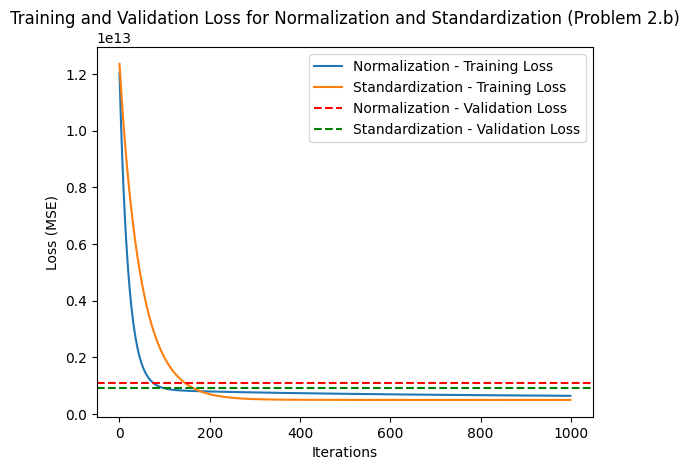

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
housing_data = pd.read_csv(url)

# Select the input variables (11 variables from Problem 1.b)
X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                  'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                  'parking', 'prefarea']]

# Encode categorical variables (yes/no) to 0 and 1
X = X.replace({'yes': 1, 'no': 0})

# Target variable
y = housing_data['price'].values

# Split the data into 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to compute the Mean Squared Error
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Function for gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Helper function to train and evaluate the model
def train_and_evaluate(X_train, y_train, X_test, y_test, scaler_type):
    if scaler_type == 'normalization':
        scaler = MinMaxScaler()  # Normalization (values between 0 and 1)
    elif scaler_type == 'standardization':
        scaler = StandardScaler()  # Standardization (mean 0, std 1)

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Add intercept term to the input data
    X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
    X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

    # Initialize theta to zeros
    theta = np.zeros(X_train_bias.shape[1])

    # Set hyperparameters
    learning_rate = 0.01
    iterations = 1000

    # Perform gradient descent
    theta_best, cost_history_train = gradient_descent(X_train_bias, y_train, theta, learning_rate, iterations)

    # Compute validation loss
    validation_loss = compute_cost(X_test_bias, y_test, theta_best)

    return theta_best, cost_history_train, validation_loss

# Train and evaluate for normalization
_, cost_history_norm, validation_loss_norm = train_and_evaluate(X_train, y_train, X_test, y_test, 'normalization')

# Train and evaluate for standardization
_, cost_history_std, validation_loss_std = train_and_evaluate(X_train, y_train, X_test, y_test, 'standardization')

# Plot the training losses for normalization and standardization
plt.plot(range(1000), cost_history_norm, label='Normalization - Training Loss')
plt.plot(range(1000), cost_history_std, label='Standardization - Training Loss')

# Display validation losses as horizontal lines
plt.axhline(y=validation_loss_norm, color='r', linestyle='--', label='Normalization - Validation Loss')
plt.axhline(y=validation_loss_std, color='g', linestyle='--', label='Standardization - Validation Loss')

plt.title('Training and Validation Loss for Normalization and Standardization (Problem 2.b)')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


Problem 3a

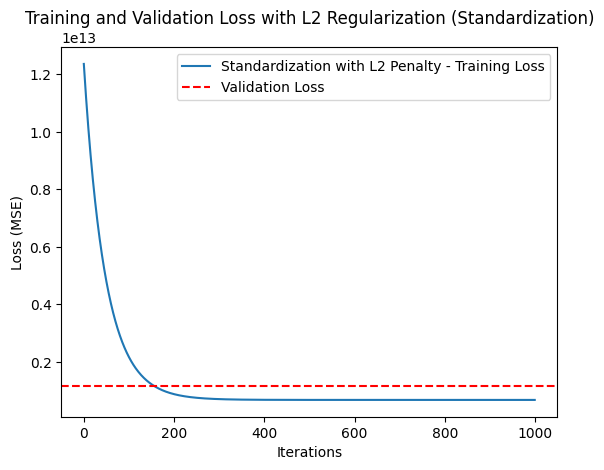

Final Validation Loss with L2 Regularization: 1146981855515.4321


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
housing_data = pd.read_csv(url)

# Select the input variables (same as Problem 2.a)
X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = housing_data['price'].values

# Split the data into 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to compute the Mean Squared Error with L2 regularization (Ridge regression)
def compute_cost_with_penalty(X, y, theta, lambda_):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    penalty = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)  # No penalty for the intercept term
    return cost + penalty

# Function for gradient descent with L2 regularization
def gradient_descent_with_penalty(X, y, theta, learning_rate, iterations, lambda_):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta[1:] -= learning_rate * (gradient[1:] + (lambda_ / m) * theta[1:])  # Apply regularization to theta (except intercept)
        theta[0] -= learning_rate * gradient[0]  # No regularization for the intercept term
        cost_history[i] = compute_cost_with_penalty(X, y, theta, lambda_)

    return theta, cost_history

# Helper function to train and evaluate the model with regularization
def train_and_evaluate_with_penalty(X_train, y_train, X_test, y_test, scaler_type, lambda_):
    if scaler_type == 'normalization':
        scaler = MinMaxScaler()  # Normalization (values between 0 and 1)
    elif scaler_type == 'standardization':
        scaler = StandardScaler()  # Standardization (mean 0, std 1)

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Add intercept term to the input data
    X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
    X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

    # Initialize theta to zeros
    theta = np.zeros(X_train_bias.shape[1])

    # Set hyperparameters
    learning_rate = 0.01
    iterations = 1000

    # Perform gradient descent with penalty (L2 regularization)
    theta_best, cost_history_train = gradient_descent_with_penalty(X_train_bias, y_train, theta, learning_rate, iterations, lambda_)

    # Compute validation loss (without regularization penalty)
    validation_loss = compute_cost_with_penalty(X_test_bias, y_test, theta_best, 0)  # No penalty for validation set

    return theta_best, cost_history_train, validation_loss

# Set the regularization parameter lambda
lambda_ = 1  # You can tune this value to observe different results

# Use the best scaling method from Problem 2.a (assumed standardization here; adjust based on your conclusion)
best_scaling = 'standardization'

# Train and evaluate with penalty (L2 regularization)
_, cost_history_penalty, validation_loss_penalty = train_and_evaluate_with_penalty(X_train, y_train, X_test, y_test, best_scaling, lambda_)

# Plot the training losses for the model with L2 regularization
plt.plot(range(1000), cost_history_penalty, label=f'{best_scaling.capitalize()} with L2 Penalty - Training Loss')

# Display validation loss as a horizontal line
plt.axhline(y=validation_loss_penalty, color='r', linestyle='--', label='Validation Loss')

plt.title(f'Training and Validation Loss with L2 Regularization ({best_scaling.capitalize()})')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Print the final validation loss
print(f'Final Validation Loss with L2 Regularization: {validation_loss_penalty}')


Problem 3b

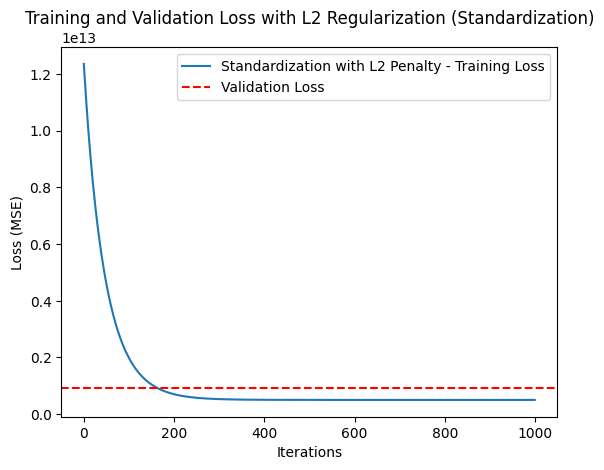

Final Validation Loss with L2 Regularization: 900418801475.2323


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
housing_data = pd.read_csv(url)

# Select the input variables (11 variables from Problem 2.b)
X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                  'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                  'parking', 'prefarea']]

# Encode categorical variables (yes/no) to 0 and 1
X = X.replace({'yes': 1, 'no': 0})

# Target variable
y = housing_data['price'].values

# Split the data into 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to compute the Mean Squared Error with L2 regularization (Ridge regression)
def compute_cost_with_penalty(X, y, theta, lambda_):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    penalty = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)  # No penalty for the intercept term
    return cost + penalty

# Function for gradient descent with L2 regularization
def gradient_descent_with_penalty(X, y, theta, learning_rate, iterations, lambda_):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta[1:] -= learning_rate * (gradient[1:] + (lambda_ / m) * theta[1:])  # Apply regularization to theta (except intercept)
        theta[0] -= learning_rate * gradient[0]  # No regularization for the intercept term
        cost_history[i] = compute_cost_with_penalty(X, y, theta, lambda_)

    return theta, cost_history

# Helper function to train and evaluate the model with regularization
def train_and_evaluate_with_penalty(X_train, y_train, X_test, y_test, scaler_type, lambda_):
    if scaler_type == 'normalization':
        scaler = MinMaxScaler()  # Normalization (values between 0 and 1)
    elif scaler_type == 'standardization':
        scaler = StandardScaler()  # Standardization (mean 0, std 1)

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Add intercept term to the input data
    X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
    X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

    # Initialize theta to zeros
    theta = np.zeros(X_train_bias.shape[1])

    # Set hyperparameters
    learning_rate = 0.01
    iterations = 1000

    # Perform gradient descent with penalty (L2 regularization)
    theta_best, cost_history_train = gradient_descent_with_penalty(X_train_bias, y_train, theta, learning_rate, iterations, lambda_)

    # Compute validation loss (without regularization penalty)
    validation_loss = compute_cost_with_penalty(X_test_bias, y_test, theta_best, 0)  # No penalty for validation set

    return theta_best, cost_history_train, validation_loss

# Set the regularization parameter lambda
lambda_ = 1  # You can tune this value to observe different results

# Use the best scaling method from Problem 2.b (assumed standardization here; adjust based on your conclusion)
best_scaling = 'standardization'

# Train and evaluate with penalty (L2 regularization)
_, cost_history_penalty, validation_loss_penalty = train_and_evaluate_with_penalty(X_train, y_train, X_test, y_test, best_scaling, lambda_)

# Plot the training losses for the model with L2 regularization
plt.plot(range(1000), cost_history_penalty, label=f'{best_scaling.capitalize()} with L2 Penalty - Training Loss')

# Display validation loss as a horizontal line
plt.axhline(y=validation_loss_penalty, color='r', linestyle='--', label='Validation Loss')

plt.title(f'Training and Validation Loss with L2 Regularization ({best_scaling.capitalize()})')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Print the final validation loss
print(f'Final Validation Loss with L2 Regularization: {validation_loss_penalty}')
